In [2]:
df.head()

,단어,감정범주,감정분류,색깔
0,글썽글썽하다,부정,슬픔과 애도,파란색
1,구슬프다,부정,슬픔과 애도,파란색
2,울먹이다,부정,슬픔과 애도,파란색
3,침울하다,부정,슬픔과 애도,파란색
4,슬퍼하다,부정,슬픔과 애도,파란색


## 긍정부정 흑백도출

선택할 감정 키워드를 입력하세요. (예: 울다, 울상, 기쁘다, 뿌듯하다): 울다, 기쁘다

각 키워드의 긍정/부정 여부:
울다: 부정
기쁘다: 긍정

내가 입력한 키워드 개수: 2개
사용자가 고른 긍정 감정 키워드 개수: 1개
사용자가 고른 부정 감정 키워드 개수: 1개
사용자가 고른 키워드 중 부정 비율: 50.00 %
사용자가 고른 키워드 중 긍정 비율: 50.00 %
전체 감정 점수: 50.00 % (0%: 가장 부정적, 100%: 가장 긍정적)


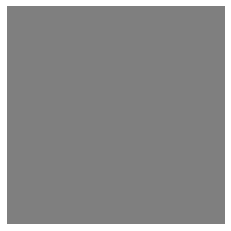

In [1]:
import pandas as pd

# 엑셀 파일 경로를 지정합니다
file_path = r"C:\Users\82102\OneDrive\바탕 화면\해커톤\감정단어_부정긍정_감정색상.xlsx"

# 엑셀 파일을 데이터프레임으로 읽어옵니다
df = pd.read_excel(file_path)

# 감정범주에서 유일한 값들을 추출합니다
unique_emotions = df['감정범주'].unique()

# 부정 및 긍정 감정 단어들을 추출합니다
negative_emotions = df[df['감정범주'] == '부정']['단어'].tolist()
positive_emotions = df[df['감정범주'] == '긍정']['단어'].tolist()

def analyze_emotions_using_words_df(user_input, negative_emotions, positive_emotions):
    # 사용자 입력을 리스트로 변환
    selected_emotions = [emotion.strip() for emotion in user_input.split(',')]

    # 각 키워드의 긍정/부정 여부 확인 및 개수 세기
    num_negative_selected = sum(1 for emotion in selected_emotions if emotion in negative_emotions)
    num_positive_selected = sum(1 for emotion in selected_emotions if emotion in positive_emotions)

    # 각 키워드의 긍정/부정 여부 출력
    print("\n각 키워드의 긍정/부정 여부:")
    for emotion in selected_emotions:
        if emotion in negative_emotions:
            print(f"{emotion}: 부정")
        elif emotion in positive_emotions:
            print(f"{emotion}: 긍정")
        else:
            print(f"{emotion}: 해당하는 감정 키워드가 없습니다.")

    # 사용자가 고른 키워드 개수 출력
    total_selected = len(selected_emotions)
    total_negative_ratio = (num_negative_selected / total_selected) * 100 if total_selected > 0 else 0
    total_positive_ratio = (num_positive_selected / total_selected) * 100 if total_selected > 0 else 0

    # 최종 점수 계산
    overall_score = (total_positive_ratio - total_negative_ratio + 100) / 2

    print(f"\n내가 입력한 키워드 개수: {total_selected}개")
    print(f"사용자가 고른 긍정 감정 키워드 개수: {num_positive_selected}개")
    print(f"사용자가 고른 부정 감정 키워드 개수: {num_negative_selected}개")
    print(f"사용자가 고른 키워드 중 부정 비율: {total_negative_ratio:.2f} %")
    print(f"사용자가 고른 키워드 중 긍정 비율: {total_positive_ratio:.2f} %")
    print(f"전체 감정 점수: {overall_score:.2f} % (0%: 가장 부정적, 100%: 가장 긍정적)")

    return overall_score

def score_to_color(score):
    """
    Converts a score (0 to 100) to a grayscale color.
    0% -> black (0, 0, 0)
    100% -> white (255, 255, 255)
    """
    gray_value = int((score / 100) * 255)
    return (gray_value, gray_value, gray_value)

def visualize_color(color):
    """
    Visualizes the color using matplotlib.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Create an image with the given color
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    img[:, :] = color

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 사용자에게 입력 받기
user_input = input("선택할 감정 키워드를 입력하세요. (예: 울다, 울상, 기쁘다, 뿌듯하다): ")

# 함수 호출
overall_score = analyze_emotions_using_words_df(user_input, negative_emotions, positive_emotions)

# 색상 변환 및 시각화
color = score_to_color(overall_score)
visualize_color(color)


## 감정 디테일분류 후 색상 도출

선택할 감정 키워드를 입력하세요. (예: 울다, 울상, 기쁘다, 뿌듯하다): 울다, 울상, 기쁘다

가장 많은 키워드가 속한 감정분류: 슬픔과 애도 
슬픔과 애도의 색상: (0, 0, 255)


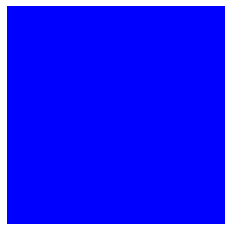

In [9]:
import pandas as pd

# 엑셀 파일 경로를 지정합니다
file_path = r"C:\Users\82102\OneDrive\바탕 화면\해커톤\감정단어_부정긍정_감정색상.xlsx"

# 엑셀 파일을 데이터프레임으로 읽어옵니다
df = pd.read_excel(file_path)

# 감정분류에서 유일한 값들을 추출합니다
unique_emotion_categories = df['감정분류'].unique()

def analyze_emotions_using_words_df(user_input, df):
    # 사용자 입력을 리스트로 변환
    selected_emotions = [emotion.strip() for emotion in user_input.split(',')]
    
    # 감정분류별로 키워드를 분류
    category_counts = {category: 0 for category in unique_emotion_categories}

    # 각 키워드의 감정분류 확인 및 개수 세기
    for emotion in selected_emotions:
        matches = df[df['단어'] == emotion]
        if not matches.empty:
            for category in matches['감정분류'].unique():
                category_counts[category] += 1
        else:
            print(f"{emotion}: 해당하는 감정 키워드가 없습니다.")

    # 가장 많은 키워드가 속한 감정분류 찾기
    max_category = max(category_counts, key=category_counts.get)
    max_count = category_counts[max_category]

    print(f"\n가장 많은 키워드가 속한 감정분류: {max_category} ")

    # 해당 감정분류의 색상
    color = emotion_category_to_color(max_category)
    print(f"{max_category}의 색상: {color}")

    return max_category, color

def emotion_category_to_color(category):
    """
    Maps an emotion category to a specific color.
    """
    if category == '슬픔과 애도':
        return (0, 0, 255)  # 파란색
    elif category == '지루함과 무료':
        return (210, 180, 140)  # 베이지/갈색
    elif category == '공포와 불안':
        return (0, 0, 0)  # 검은색
    elif category == '기쁨과 행복':
        return (255, 255, 0)  # 노란색
    elif category == '자존감과 성취':
        return (128, 0, 128)  # 보라색
    elif category == '따뜻함과 감사':
        return (0, 255, 0)  # 초록색
    else:
        return (128, 128, 128)  # 회색 (기타)

def visualize_color(color):
    """
    Visualizes the color using matplotlib.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Create an image with the given color
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    img[:, :] = color

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 사용자에게 입력 받기
user_input = input("선택할 감정 키워드를 입력하세요. (예: 울다, 울상, 기쁘다, 뿌듯하다): ")

# 함수 호출
max_category, color = analyze_emotions_using_words_df(user_input, df)

# 색상 시각화
visualize_color(color)
